# import

In [24]:
import pandas as pd
import numpy as np
import os
from pandas import DataFrame
from datetime import datetime

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import platform
if platform.system() == 'Windows':
    # 윈도우인 경우
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:    
# Mac 인 경우
    rc('font', family='AppleGothic')
    
matplotlib.rcParams['axes.unicode_minus'] = False 

# StartupOrClosing_Shop_ver2.csv 데이터 시각화

### 데이터 불러오기

In [25]:
startup_shop = pd.read_csv('C:/code/ktbigdatacode/StartupOrClosing_Shop_ver2.csv',encoding="utf-8",low_memory=False)

startup_shop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101784 entries, 0 to 101783
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   No            101784 non-null  int64 
 1   DATE          101784 non-null  int64 
 2   INDUTY_NM     101784 non-null  object
 3   CMPNM         101783 non-null  object
 4   INDUTY_CODEM  101784 non-null  int64 
 5   division      101784 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 4.7+ MB


In [26]:
startup_shop.isnull().sum() # 널값 확인 후 해당 널값이 이후 데이터 처리상 영향을 미치지 못하는 널값으로 확인하여 해당 널값은 신경을 안쓰고 진행합니다.

No              0
DATE            0
INDUTY_NM       0
CMPNM           1
INDUTY_CODEM    0
division        0
dtype: int64

### 업종/상호별 창업 폐업 유츄 데이터 전체 중 창업 폐업의 비율

가정 : 코로나가 우리나라에 시작된 기간의 데이터의 창업의 비율은 페업의 비율보다 작을 것으로 생각합니다.

[11772, 90012]


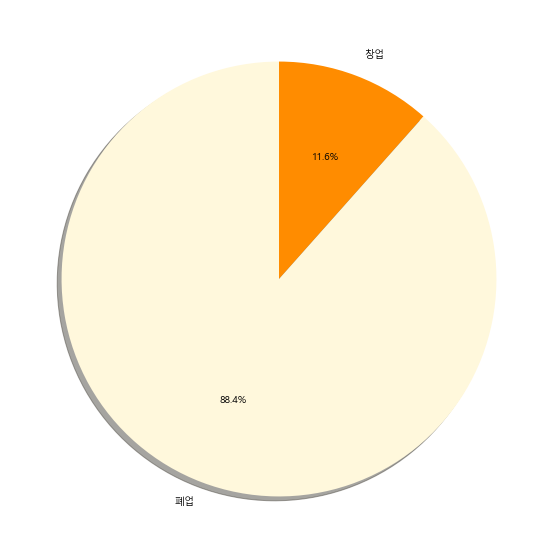

In [27]:
division_1 = startup_shop['division'] == 1   # 창폐업 구분이 1과 0으로 구분되어 있는 데이터를 각각 구분하여 이를 새로 저장하고 해당 창폐업을 파이그래프로 표현하였습니다.
division_0 = startup_shop['division'] == 0

subset_df1 = startup_shop[division_1] 
subset_df0 = startup_shop[division_0]
f1 = []
f1.append(len(subset_df1))
f1.append(len(subset_df0))
print(f1)
explode_value=(0,0)
name_pie = ['창업','폐업']
col=['darkorange','cornsilk']


plt.figure(figsize=(10,10))
plt.pie(f1,labels=name_pie,autopct='%0.1f%%',startangle=90,explode=explode_value,shadow=True,colors=col,counterclock=False)

plt.show()

결과 : 
코로나 이후 창업의 비율이 **11.6%** 폐업의 비율이 **88.4%** 를 차지하고 있는 모습을 확인할 수 있습니다. 
하지만 이러한 모습은 코로나의 문제라고만 설명하기에는 많은 변수들이 있다고 생각합니다.

대표적으로 많은 사람들이 도전하는 요식업의 하나인 치킨의 경우 3년에서 5년 정도에 수많은 업장들이 폐업을 한다고 합니다. 
따라서 이렇게 폐업의 비율은 특정 기간에 폐업한 경우라고 하지만 다른 추가적인 변수의 영향도 있을 것으로 생각됩니다.

출처 : [뉴스](https://www.mk.co.kr/news/society/view/2021/07/729566/)

### 업종/상호별 창업 폐업 유츄 데이터 전체 중 월별 창업 폐업

가정 : 우리나라의 코로나의 위기의식이 심해진 대구 코로나 상황을 본 데이터가 가지고 있어 대구 코로나가 확진이 시작된 2월을 기준으로 폐업률을 더욱 빠르게 높아질 것으로 생각하였습니다.

[166, 0, 0, 0, 0, 11606] [123, 127, 108, 101, 70205, 19348]


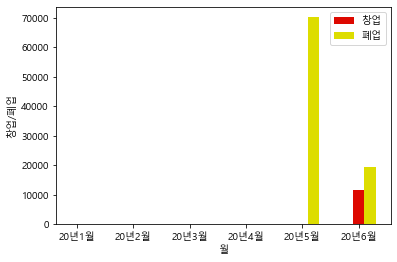

In [28]:
startup_shop['DATE']= startup_shop['DATE'].astype('str')
startup_shop['DATE']=startup_shop['DATE'].apply(lambda _ : datetime.strptime(_,'%Y%m%d')) # Datetime 형태로 변환하여 시간별로 창업 폐업의 모습을 확인하기 위해 해당 데이터를 진행하였습니다.
start_up_shop_filter1 = startup_shop.loc[startup_shop['division'] == 1]
start_up_shop_filter0 = startup_shop.loc[startup_shop['division'] == 0]
start_up_shop_filter1.index = start_up_shop_filter1['DATE']
start_up_shop_filter0.index = start_up_shop_filter0['DATE']
monthly_df_1 = start_up_shop_filter1.resample('M')['division'].count()                    # division 별로 각 월을 카운트 하여 각 저장하고 바 그래프를 그려보았습니다.
monthly_df_0 = start_up_shop_filter0.resample('M')['division'].count()



label = ['20년1월','20년2월','20년3월','20년4월','20년5월','20년6월']
f1 = [x for x in monthly_df_1 ]
f2 = [x for x in monthly_df_0 ]


x = np.arange(len(label))
plt.bar(x-0.0,f1,label='창업',width=0.2,color='#dd0800')
plt.bar(x+0.2,f2,label='폐업',width=0.2,color='#dddd00')
plt.xticks(x,label)


plt.legend()
plt.xlabel('월')
plt.ylabel('창업/폐업')


print(f1 , f2)
plt.show()

결과 : 
창폐업의 데이터가 특정한 달에 몰려 있고 f1 값인 창업의 값은 20년 2월부터 0의 수치가 있는 것과 f2의 값도 5월에 7만건 가량 폐업이 잡히는 모습으로 보아 해당 데이터를 활용하여 월별 창업 폐업의 비율 등 다양한 시각화를 하는 것은 부적합하다고 생각하였습니다.

이후 외부데이터를 활용하여 해당 데이터의 신뢰성을 분석한 결과 
중소벤처기업부의 [보도자료](https://www.k-startup.go.kr/common/post/detail.do?mid=30005&bid=710&postSn=129149)를 확인한 결과 제공받은 데이터는 전체를 포함하지 않고 부적합한 데이터라고 판단하여 데이터가 무엇을 의미하고 싶은 의미만을 파악하는 것에 초점을 두고 생각하기로 하였습니다.

## 요식산업 관련 데이터 

이유 : 

StartupOrClosing_Shop의 데이터의 업종명의 분류가 요식업 관련이 아닌 모든 산업 업종으로 분류가 되어 있어 우선적으로 요식업 관련 업종으로 엑셀을 활용하여 전처리 작업을 하였습니다. 

중복값 제거를 활용하여 전체 데이터 중 음식 관련 데이터를 하나씩 분석하여 TXT 음식산업 인덱스를 만들어 해당 음식 산업을 새로 음식산업 관련 파일로 만들어 이후 요식업 관련 데이터만 따로 확인 할 수 있도록 전처리 작업을 진행하였습니다.

In [29]:
# 일일이 엑셀로 중복값 제거하고 하나씩 확인 후 요식업 관련 업종명만 추출 총 190개의 요식업 산업만 분류하였습니다
txt = '''갈비탕
감자탕
감자튀김
개.염소.양고기도매
건어물상
게요리
고기부페
고래고기
곰탕
곱창.양구이
과일주스전문점
관광음식점
국수
굴요리
기사식당
김밥
김치
꽈배기전문
꿩고기
낙지요리
냉면
다방
다슬기요리
닭갈비
닭강정
닭발
닭요리
대구탕
도너츠
도시락
돈가스
동남아음식
돼지갈비
돼지국밥
두부요리
떡.한과
떡갈비
떡볶이
떡집
라면
로바다야끼
막국수
막창
만두
말고기
매운탕
머릿고기
메밀요리
멕시코요리
멧돼지고기
문어요리
문화카페
민속주점
밀면
바닷가재요리
반찬가게
백숙
버섯요리
베트남음식
보리밥
보리빵
복어요리
부대찌개
부페
분식
불닭
브라질요리
브런치카페
비빕밥
빙과류도매
빵.과자
사찰음식점
사철.영양탕
삼겹살
삼계탕
샌드위치
샐러드전문점
샤브샤브
샤브샤브부페
설렁탕
소고기국밥
소머리국밥
수제맥주
수제파이
순대.순대국
순대국밥
순두부
스테이크
스파게티
스페인요리
시락국밥
쌈밥
아귀요리
아이스크림
야식
양고기
양식
어죽
어탕
연어전문
오뎅바
오리고기
오리요리
오메기떡판매
오징어요리
와플전문점
우동
육개장전문
육류.고기요리
육류가공
음식점-고로케전문
음식점-닭요리전문
음식점-돌잔치부페
음식점-마라탕
음식점-연탄구이전문
음식점-차돌박이전문
음식점-츄러스
이탈리아요리
인도음식
인삼제품
일식
일식튀김.꼬치
장어
전.빈대떡.부침
전복요리
전통찻집
젓갈판매
정육점
제과점
제사음식
조개구이
족발.보쌈
주먹밥
죽전문점
중국음식
쭈꾸미요리
찌개.전골
찜닭
참기름
참치요리
채소가게
채식부페
철판구이
청과물
초밥.롤
초밥부페
추어탕
출장요리
치킨
카레
카페
카페-디저트
카페-힐링
칼국수
커피가공
케이크전문점
코다리전문
콩국수
콩나물국밥
콩요리
태국음식
토끼고기
토스트
패스트푸드(종합)
편의점
포장마차
푸드트럭
퓨전음식
프랑스요리
프랜차이즈
피자
한식
한식배달
한식부페
한우고기
한정식
핫도그
해물.생선요리
해물부페
해장국
햄버거
호두과자
호떡
호프
홍어
화덕피자전문
횟집
흑돼지
흑염소'''

startup_shop = pd.read_csv('C:/code/ktbigdatacode/StartupOrClosing_Shop_ver2.csv',low_memory=False)

categoryList=txt.split("\n")   # txt를 \n로 나눠 하나의 카테고리 리스트로 변환

dlvr_category=[]
for i in categoryList:    # for 문을 활용하여 각 카테고리 별 csv 파일로 변환 후 특정 폴더에 저장
    dlvr_category1 = startup_shop.loc[startup_shop['INDUTY_NM'] == i]
    dlvr_category1.to_csv('C:\\code\\ktbigdatacode\\데이터 인사이트\\startup\\' + str(i) +'.csv')


# 음식점-생태/동태/명태요리전문 해당 업종명은 for 문을 실행하는 당시 오류가 있어 따로 확인 후 같이 저장
dlvr_category1 = startup_shop.loc[startup_shop['INDUTY_NM'] == '음식점-생태/동태/명태요리전문']
dlvr_category1.to_csv('C:\\code\\ktbigdatacode\\데이터 인사이트\\startup\\생태.동태.명태요리.csv')


import os  # csv 파일로 만들어진 파일을 모두 불러 온 후 하나의 데이터 프레임으로 변환 하고 이를 앞으로 활용할 데이터 파일로 변환하기 위해 새로 저장

path = 'C:\\code\\ktbigdatacode\\데이터 인사이트\\startup\\'
file_list = os.listdir(path)
file_list_py = [file for file in file_list if file.endswith('.csv')] 
file_list_py

df = pd.DataFrame()
for i in file_list_py:
    data = pd.read_csv(path + i)
    df = pd.concat([df,data])
    
start_up_shop_food = df.reset_index(drop = True)
start_up_shop_food=start_up_shop_food[['DATE','INDUTY_NM','CMPNM','INDUTY_CODEM','division']]
start_up_shop_food.dropna(inplace=True)
start_up_shop_food.to_csv('C:/code/ktbigdatacode/데이터 인사이트/shop음식관련.csv',encoding='utf-8-sig')  

### 이후 TXT로 정의한 요식업 관련 업종명에서 음식관련 데이터를 만들어 전체 데이터 중 음식관련 업종의 시각화를 진행합니다

In [30]:
startup_shop_food = pd.read_csv('C:/code/ktbigdatacode/데이터 인사이트/shop음식관련.csv',encoding="utf-8",low_memory=False)
startup_shop_food.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17762 entries, 0 to 17761
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    17762 non-null  int64 
 1   DATE          17762 non-null  int64 
 2   INDUTY_NM     17762 non-null  object
 3   CMPNM         17762 non-null  object
 4   INDUTY_CODEM  17762 non-null  int64 
 5   division      17762 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 832.7+ KB


In [31]:
startup_shop_food.isnull().sum()    # 음식관련 데이터는 널값이 나오지 않아 다른 처리가 필요하지 않을 것으로 보입니다.

Unnamed: 0      0
DATE            0
INDUTY_NM       0
CMPNM           0
INDUTY_CODEM    0
division        0
dtype: int64

## 요식업 관련 데이터의 창업과 폐업

가정 : 
요식업은 전체 산업의 창업보다 더욱 접근성이 좋아 많은 창업의 비율이 조금은 높아질 것이다. 

출처 :[뉴스](https://www.mk.co.kr/news/economy/view/2020/05/512515/)

[3241, 14521]


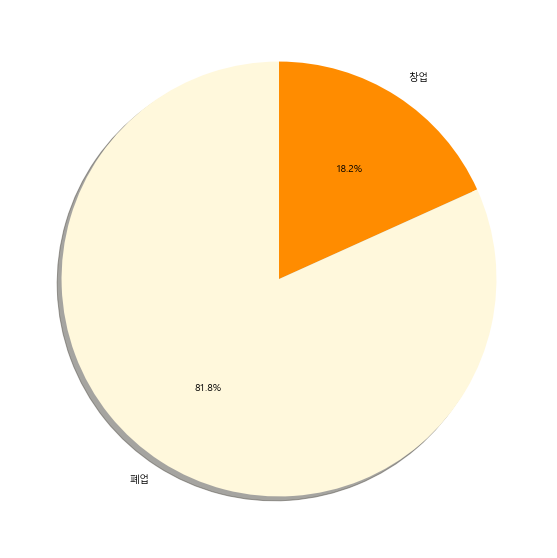

In [32]:
division_1 = startup_shop_food['division'] == 1  # 음식업 데이터의 division의 1과 0을 구분하여 창업과 폐업의 그래프로 파이그래프를 활용하였습니다.
division_0 = startup_shop_food['division'] == 0

subset_df1 = startup_shop_food[division_1] 
subset_df0 = startup_shop_food[division_0]
f1 = []
f1.append(len(subset_df1))
f1.append(len(subset_df0))
print(f1)
explode_value=(0,0)
name_pie = ['창업','폐업']
col=['darkorange','cornsilk']


plt.figure(figsize=(10,10))
plt.pie(f1,labels=name_pie,autopct='%0.1f%%',startangle=90,explode=explode_value,shadow=True,colors=col,counterclock=False)

plt.show()

결과 : 
창업이 **18.2%** 폐업이 **81.8%** 로 요식업의 창업은 전체산업의 측면에서 보면 많이 증가한 모습을 보여주었습니다. 하지만 여전히 폐업의 비중이 큰 모습으로 보여집니다. 
하지만 이러한 모습은 코로나의 문제라고만 설명하기에는 많은 변수들이 있다고 생각합니다.


대표적으로 많은 사람들이 도전하는 요식업의 하나인 치킨의 경우 3년에서 5년 정도에 수많은 업장들이 폐업을 한다고 합니다.
따라서 이렇게 폐업의 비율은 특정 기간에 폐업한 경우라고 하지만 다른 추가적인 변수의 영향도 있을 것으로 생각됩니다.

출처 : [뉴스](https://www.mk.co.kr/news/society/view/2021/07/729566/)

## 요식업 관련 데이터 월별 창업 폐업

가정 : 코로나의 확진이 시작된 대구 2월을 기준으로 하여 폐업의 수는 많아 질 것으로 생각 해 볼 수 있고 특히 요식업의 폐업은 점점 증가하는 모습의 그래프를 보일 것으로 예측

[10, 0, 0, 0, 0, 3231] [24, 24, 14, 12, 10562, 3885]


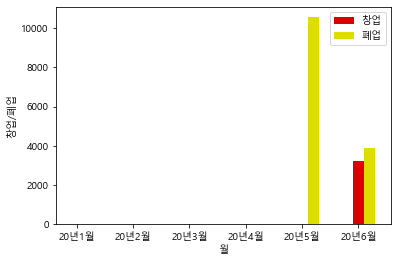

In [33]:
startup_shop_food['DATE']= startup_shop_food['DATE'].astype('str')
startup_shop_food['DATE']=startup_shop_food['DATE'].apply(lambda _ : datetime.strptime(_,'%Y%m%d')) # Datetime 형태로 변환하여 월별 창업 폐업의 데이터를 저장하였습니다.
startup_shop_test_filter1 = startup_shop_food.loc[startup_shop_food['division'] == 1]
startup_shop_test_filter0 = startup_shop_food.loc[startup_shop_food['division'] == 0]
startup_shop_test_filter1.index = startup_shop_test_filter1['DATE']
startup_shop_test_filter0.index = startup_shop_test_filter0['DATE']
monthly_df_1 = startup_shop_test_filter1.resample('M')['division'].count()
monthly_df_0 = startup_shop_test_filter0.resample('M')['division'].count()


label = ['20년1월','20년2월','20년3월','20년4월','20년5월','20년6월']
f1 = [x for x in monthly_df_1 ]
f2 = [x for x in monthly_df_0 ]
x = np.arange(len(label))
print(f1, f2)


plt.bar(x-0.0,f1,label='창업',width=0.2,color='#dd0000')
plt.bar(x+0.2,f2,label='폐업',width=0.2,color='#dddd00')
plt.xticks(x,label)


plt.legend()
plt.xlabel('월')
plt.ylabel('창업/폐업')

plt.show()

결과 : 

본 데이터도 기존의 데이터가 이미 5월에 많은 데이터로 몰려 있는 모습이 있어 해당 데이터가 없는 것으로 판단하였습니다.
또한 5월 29일에 수많은 데이터가 몰려 있는 데이터의 특성상 특정 월별 데이터를 가지고 해당 월에 어느정도의 산업이 폐업하고 창업하였는지 데이터를 명확하게 확인하기에 데이터가 많이 부족하였습니다.

이번 과정을 통해 만약 데이터가 데이터가 생성된 날짜가 아닌 폐업한 날짜 혹은 폐업신청을 한 날짜의 데이터가 있었으면 더욱 좋은 관점을 제시할 수 있었을 것이라 생각하니 데이터가 많이 아쉬웠습니다.
또 해당 데이터의 범위가 전국인지 서울인지 특정 지역인지 알 수 없어 명확한 구분을 하지 못하였으나 전국 혹은 서울의 데이터라고 판단하고 데이터를 바라본 결과 우리마을가게 상권분석의 외식업의 개폐업수랑 본 데이터를 같이 확인한 결과 동일기간인 6개월 간의 창업과 폐업의 수의 차이가 있는 것으로 확인되어 이런 데이터의 확인도 필요할 것이라고 생각하였습니다.

만약 본 데이터가 특정 지역의 산업의 모습이라고 언급이 되어 있거나 해당 특정 지역의 수라고 언급이 되어 있으면 조금 더 지역적인 시각에서의 새로운 관점을 제시할 수 있었을 것이라 생각합니다.


# StartupOrClosing_Region_ver2.csv 데이터 시각화

### 전처리

In [34]:
startup_region = pd.read_csv('C:/code/ktbigdatacode/StartupOrClosing_Region_ver2.csv',low_memory=False)

startup_region.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67257 entries, 0 to 67256
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   INDEX               67257 non-null  int64 
 1   DATE                67257 non-null  int64 
 2   INDUTY_NM           67257 non-null  object
 3   BRTC_NM             67257 non-null  object
 4   SIGUNGU_NM          67257 non-null  object
 5   EMD                 67257 non-null  object
 6   LA_DCMLPOINT_VALUE  67257 non-null  object
 7   LO_DCMLPOINT_VALUE  67257 non-null  object
 8   DIVISION            67257 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 4.6+ MB


In [35]:
startup_region.isnull().sum()

INDEX                 0
DATE                  0
INDUTY_NM             0
BRTC_NM               0
SIGUNGU_NM            0
EMD                   0
LA_DCMLPOINT_VALUE    0
LO_DCMLPOINT_VALUE    0
DIVISION              0
dtype: int64

## 스타트업 업종/지역별 창업폐업 데이터 속 창업과 폐업의 비율

가정 : 

위의 스타트업 업종/상호별 데이터와 같은 데이터의 제공처에서 제공해준 데이터라 창업과 폐업의 비율이 비슷할 것이라고 생각하였습니다.

[1724, 65533]


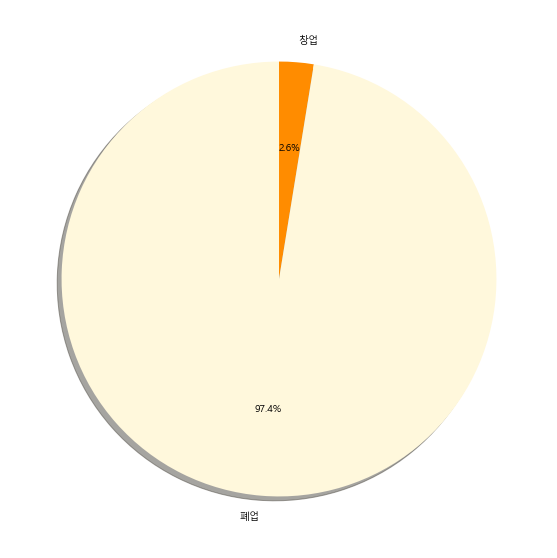

In [36]:
f3 = [startup_region['DIVISION'].value_counts()[1],startup_region['DIVISION'].value_counts()[0]]
print(f3)
explode_value=(0,0)
name_pie = ['창업','폐업']
col=['darkorange','cornsilk']


plt.figure(figsize=(10,10))
plt.pie(f3,labels=name_pie,autopct='%0.1f%%',startangle=90,explode=explode_value,shadow=True,colors=col,counterclock=False)

plt.show()

결과 : 지역별로 나누어진 데이터 속 창업과 폐업의 비율이 극심하게 차이가 나는 모습을 보여주었습니다.

 창업의 비율이 전체 산업중에 **2.6%** 폐업의 비율이 **97.4%** 로 설명됩니다. 스타트업 관련 창업폐업 데이터를 같은 기관에서 제공받았지만 두 데이터 간의 이렇게 큰 격차가 있는 이유를 판단하기에 데이터에 주어진 정보가 많이 없습니다.



## 스타트업 업종 / 지역별 창업 폐업 데이터 속 월별 창업 폐업 비율

가정 : 
지역별 창업 폐업 데이터도 전체로 확인하면 우리나라에 코로나가 심해진 2월을 기준으로 점점 우상향 하는 모습의 증가하는 모습이 보일 것으로 생각하였습니다.

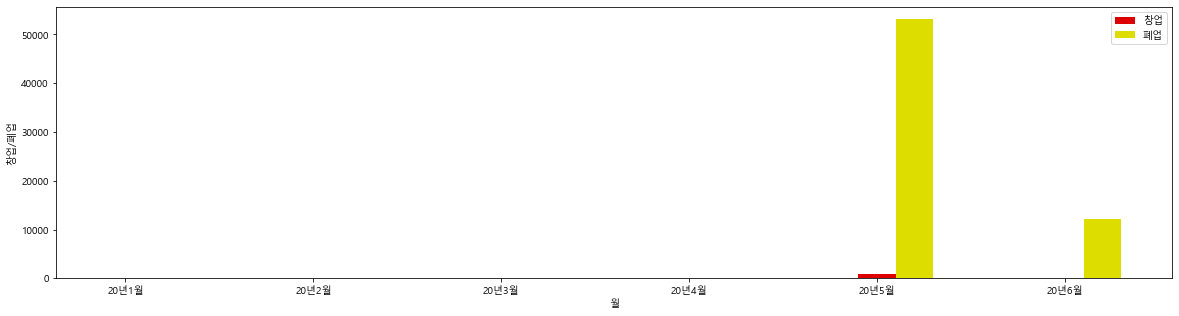

In [37]:
startup_region['DATE']= startup_region['DATE'].astype('str')
startup_region['DATE']=startup_region['DATE'].apply(lambda _ : datetime.strptime(_,'%Y%m%d'))
startup_region_test_filter1 = startup_region.loc[startup_region['DIVISION'] == 1]
startup_region_test_filter0 = startup_region.loc[startup_region['DIVISION'] == 0]
startup_region_test_filter1.index = startup_region_test_filter1['DATE']
startup_region_test_filter0.index = startup_region_test_filter0['DATE']
monthly_df_1 = startup_region_test_filter1.resample('M')['DIVISION'].count()
monthly_df_0 = startup_region_test_filter0.resample('M')['DIVISION'].count()

label = ['20년1월','20년2월','20년3월','20년4월','20년5월','20년6월']
f1 = [x for x in monthly_df_1 ]
f2 = [x for x in monthly_df_0 ]
x = np.arange(len(label))
# print(f2)
plt.figure(figsize=(20,5))

plt.bar(x-0.0,f1,label='창업',width=0.2,color='#dd0000')
plt.bar(x+0.2,f2,label='폐업',width=0.2,color='#dddd00')
plt.xticks(x,label)


plt.legend()
plt.xlabel('월')
plt.ylabel('창업/폐업')

plt.show()



결과 : 
스타트업 업종/상호별 창업폐업 데이터와 같은 기관에서 제공한 데이터라 데이터가 생성된 날짜로 데이터가 몰려 있어 5월에 데이터가 많이 몰려 있는 모습을 보여주었습니다.

데이터가 생성된 날짜가 아닌 폐업의 날짜 혹은 폐업신청의 날짜 그리고 창업은 해당 기간에 창업으로 구분되어지지만 폐업은 기존의 많은 업종 중 해당 기간에 폐업을 하는 모습이라 전반적인 비율이 적을 것으로 생각되어 데이터가 만약 필요하면 스타트업의 운영기간과 같은 세부적인 데이터가 있으면 더욱 효과적인 관점에서 다양한 시각화를 할 수 있을 것이라고 생각하였습니다.


## 스타트업 업종/지역별 창업폐업 데이터 속 지역별 창업 폐업 비율

가정 : 
월별 데이터의 변화를 확인할 수 없어서 다음으로 분류 할 수 있는 지역별 데이터를 확인하였습니다. 폐업의 비율이 대구의 코로나 관련 이슈 중 지역사회 확산 방지 대책을 실시하여 대구 지역의 유동인구를 줄였기 때문에 대구지역의 폐업률의 변화가 있었을 것으로 예상하였습니다.

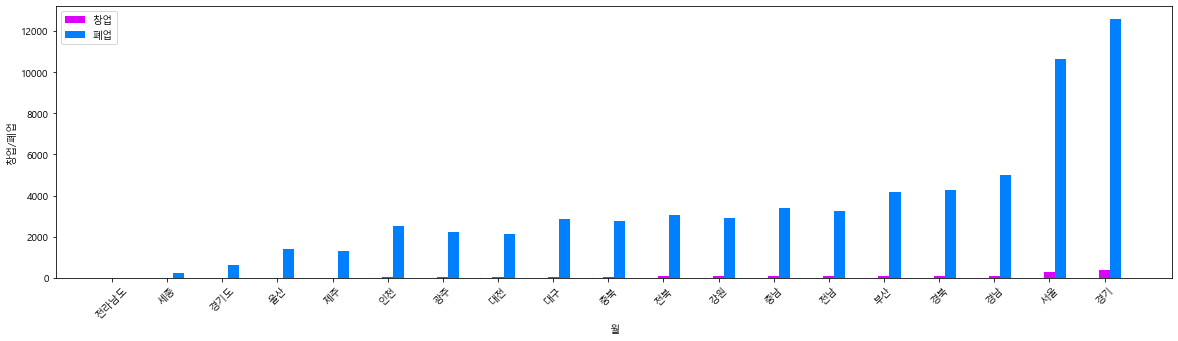

In [38]:
kor_do = ['전라남도','세종','경기도','울산','제주','인천','광주','대전','대구','충북','전북','강원','충남','전남','부산','경북','경남','서울','경기']
f1 = []
f2 = []
dlvr_category=[]
for i in kor_do:
    dlvr_category1 = startup_region['BRTC_NM'] == i
    division_1 = startup_region['DIVISION'] == 1
    division_0 = startup_region['DIVISION'] == 0
    subset_df1 = startup_region[dlvr_category1 & division_1] 
    subset_df0 = startup_region[dlvr_category1 & division_0]
    f1.append(len(subset_df1))
    f2.append(len(subset_df0))

label = ['전라남도','세종','경기도','울산','제주','인천','광주','대전','대구','충북','전북','강원','충남','전남','부산','경북','경남','서울','경기']

x = np.arange(len(label))
plt.figure(figsize=(20,5))
plt.bar(x-0.0,f1,label='창업',width=0.2,color='#dd00ff')
plt.bar(x+0.2,f2,label='폐업',width=0.2,color='#0080ff')
plt.xticks(x,label,rotation=45)


plt.legend()
plt.xlabel('월')
plt.ylabel('창업/폐업')

plt.show()

결과 : 

전국의 데이터가 지역별로 나누어진 데이터였습니다. 따라서 광역시도명 명칭으로 우선적으로 창업과 폐업의 비율을 확인하였고 서울과 경기 즉 수도권의 창업과 폐업이 많다는 내용을 확인하였습니다. 해당 데이터는 비율을 활용하여야 역할이 있을 것이라 생각하였지만 이미 기존의 제공받은 데이터속 정보가 많이 치우친 모습을 보여 비율을 확인하는 단계는 진행하지 않았습니다.

따라서 대구의 변화의 모습은 본 데이터가 5월에 많은 데이터가 몰려 있는 데이터라 변화량의 확인은 어려운 모습을 보여주었습니다.

## 요식산업 관련 데이터 

이유 : 

StartupOrClosing_Region의 데이터의 업종명의 분류가 요식업 관련이 아닌 모든 산업 업종으로 분류가 되어 있어 우선적으로 요식업 관련 업종으로 엑셀을 활용하여 전처리 작업을 하였습니다. 

중복값 제거를 활용하여 전체 데이터 중 음식 관련 데이터를 하나씩 분석하여 TXT 음식산업 인덱스를 만들어 해당 음식 산업을 새로 음식산업 관련 파일로 만들어 이후 요식업 관련 데이터만 따로 확인 할 수 있도록 전처리 작업을 진행하였습니다.

In [39]:
startup_region = pd.read_csv('C:/code/ktbigdatacode/StartupOrClosing_region_ver2.csv',low_memory=False)

categoryList=txt.split("\n")   # txt를 \n로 나눠 하나의 카테고리 리스트로 변환

dlvr_category=[]
for i in categoryList:    # for 문을 활용하여 각 카테고리 별 csv 파일로 변환 후 특정 폴더에 저장
    dlvr_category2 = startup_region.loc[startup_region['INDUTY_NM'] == i]
    dlvr_category2.to_csv('C:\\code\\ktbigdatacode\\데이터 인사이트\\startup_region\\' + str(i) +'.csv')


# 음식점-생태/동태/명태요리전문 해당 업종명은 for 문을 실행하는 당시 오류가 있어 따로 확인 후 같이 저장
dlvr_category2 = startup_region.loc[startup_region['INDUTY_NM'] == '음식점-생태/동태/명태요리전문']
dlvr_category2.to_csv('C:\\code\\ktbigdatacode\\데이터 인사이트\\startup_region\\생태.동태.명태요리.csv')


import os  # csv 파일로 만들어진 파일을 모두 불러 온 후 하나의 데이터 프레임으로 변환 하고 이를 앞으로 활용할 데이터 파일로 변환하기 위해 새로 저장

path = 'C:\\code\\ktbigdatacode\\데이터 인사이트\\startup_region\\'
file_list = os.listdir(path)
file_list_py = [file for file in file_list if file.endswith('.csv')] 
file_list_py

df = pd.DataFrame()
for i in file_list_py:
    data = pd.read_csv(path + i)
    df = pd.concat([df,data])
    
start_up_region_food = df.reset_index(drop = True)
start_up_region_food=start_up_region_food[['DATE','INDUTY_NM','BRTC_NM','SIGUNGU_NM','EMD','LA_DCMLPOINT_VALUE','LO_DCMLPOINT_VALUE','DIVISION']]
start_up_region_food.dropna(inplace=True)
start_up_region_food.to_csv('C:/code/ktbigdatacode/데이터 인사이트/region음식관련.csv',encoding='utf-8-sig')  

### TXT로 정의한 요식업 관련 업종명에서 음식관련 데이터를 만들어 해당 전체 데이터 중 음식관련 업종의 시각화를 진행합니다

In [40]:
startup_region_food = pd.read_csv('C:/code/ktbigdatacode/데이터 인사이트/region음식관련.csv',encoding="utf-8",low_memory=False)
startup_region_food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11326 entries, 0 to 11325
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          11326 non-null  int64 
 1   DATE                11326 non-null  object
 2   INDUTY_NM           11326 non-null  object
 3   BRTC_NM             11326 non-null  object
 4   SIGUNGU_NM          11326 non-null  object
 5   EMD                 11326 non-null  object
 6   LA_DCMLPOINT_VALUE  11326 non-null  object
 7   LO_DCMLPOINT_VALUE  11326 non-null  object
 8   DIVISION            11326 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 796.5+ KB


In [41]:
startup_region_food.isnull().sum() 

Unnamed: 0            0
DATE                  0
INDUTY_NM             0
BRTC_NM               0
SIGUNGU_NM            0
EMD                   0
LA_DCMLPOINT_VALUE    0
LO_DCMLPOINT_VALUE    0
DIVISION              0
dtype: int64

## 요식업 관련 지역데이터의 창업과 폐업

가정 : 
요식업은 전체 산업의 창업보다 더욱 접근성이 좋아 많은 창업의 비율이 조금은 높아질 것이다. 

출처 : [뉴스](https://www.mk.co.kr/news/economy/view/2020/05/512515/)

[410, 10916]


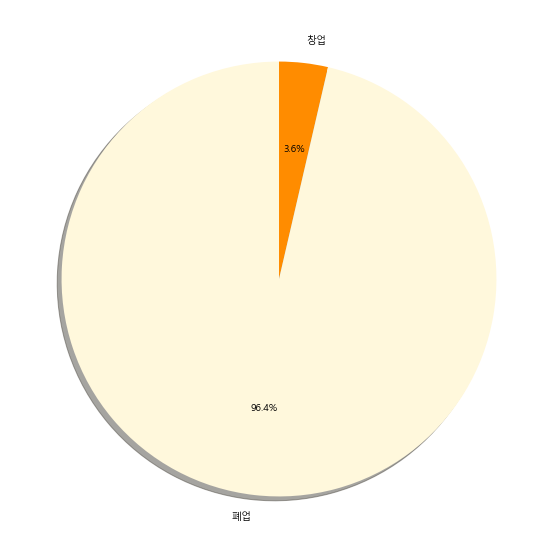

In [42]:
f3 = [startup_region_food['DIVISION'].value_counts()[1],startup_region_food['DIVISION'].value_counts()[0]]
print(f3)
explode_value=(0,0)
name_pie = ['창업','폐업']
col=['darkorange','cornsilk']


plt.figure(figsize=(10,10))
plt.pie(f3,labels=name_pie,autopct='%0.1f%%',startangle=90,explode=explode_value,shadow=True,colors=col,counterclock=False)

plt.show()

결과 : 
창업의 비율은 **3.8%** 폐업의 비율은 **96.2%** 의 모습을 보여주었습니다.


요식업의 창업은 전체산업의 측면에서 보면 많이 증가한 모습을 보여주었습니다. 하지만 여전히 폐업의 비중이 큰 모습으로 보여집니다. 
하지만 이러한 모습은 코로나의 문제라고만 설명하기에는 많은 변수들이 있다고 생각합니다.


대표적으로 많은 사람들이 도전하는 요식업의 하나인 치킨의 경우 3년에서 5년 정도에 수많은 업장들이 폐업을 한다고 합니다.
따라서 이렇게 폐업의 비율은 특정 기간에 폐업한 경우라고 하지만 다른 추가적인 변수의 영향도 있을 것으로 생각됩니다.

출처 : [뉴스](https://www.mk.co.kr/news/society/view/2021/07/729566/)

## 요식업 관련 지역데이터 월별 창업 폐업

가정 : 코로나의 확진이 시작된 대구 2월을 기준으로 하여 폐업의 수는 많아 질 것으로 생각 해 볼 수 있고 특히 요식업의 폐업은 점점 증가하는 모습의 그래프를 보일 것으로 예측

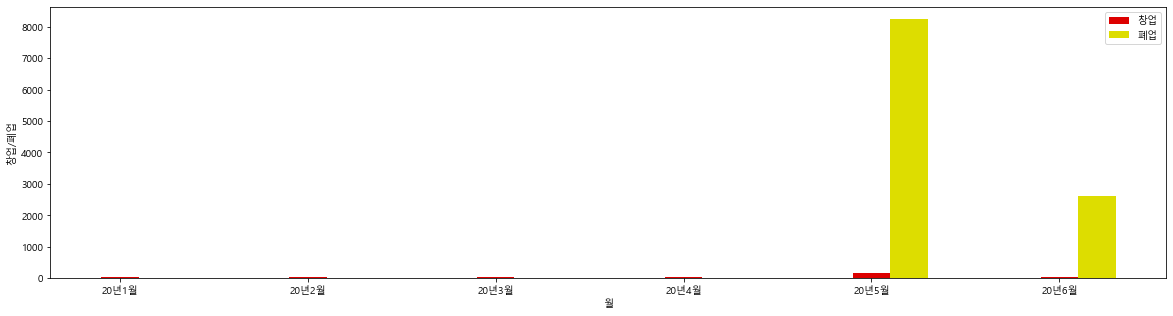

In [43]:

startup_region_food['DATE']= startup_region_food['DATE'].astype('str')
startup_region_food['DATE']=startup_region_food['DATE'].apply(lambda _ : datetime.strptime(_,'%Y-%m-%d'))
startup_region_test_filter1 = startup_region_food.loc[startup_region_food['DIVISION'] == 1]
startup_region_test_filter0 = startup_region_food.loc[startup_region_food['DIVISION'] == 0]
startup_region_test_filter1.index = startup_region_test_filter1['DATE']
startup_region_test_filter0.index = startup_region_test_filter0['DATE']
monthly_df_1 = startup_region_test_filter1.resample('M')['DIVISION'].count()
monthly_df_0 = startup_region_test_filter0.resample('M')['DIVISION'].count()


label = ['20년1월','20년2월','20년3월','20년4월','20년5월','20년6월']
f1 = [x for x in monthly_df_1 ]
f2 = [x for x in monthly_df_0 ]
x = np.arange(len(label))

plt.figure(figsize=(20,5))
plt.bar(x-0.0,f1,label='창업',width=0.2,color='#dd0000')
plt.bar(x+0.2,f2,label='폐업',width=0.2,color='#dddd00')
plt.xticks(x,label)


plt.legend()
plt.xlabel('월')
plt.ylabel('창업/폐업')

plt.show()

결과 : 

본 데이터도 기존의 데이터가 이미 5월에 많은 데이터로 몰려 있는 모습이 있어 해당 데이터가 없는 것으로 판단하였습니다.
또한 5월 29일에 수많은 데이터가 몰려 있는 데이터의 특성상 특정 월별 데이터를 가지고 해당 월에 어느정도의 산업이 폐업하고 창업하였는지 데이터를 명확하게 확인하기에 데이터가 많이 부족하였습니다.

이번 과정을 통해 만약 데이터가 데이터가 생성된 날짜가 아닌 폐업한 날짜 혹은 폐업신청을 한 날짜의 데이터가 있었으면 더욱 좋은 관점을 제시할 수 있었을 것이라 생각하니 데이터가 많이 아쉬웠습니다.
또 해당 데이터의 범위가 전국인지 서울인지 특정 지역인지 알 수 없어 명확한 구분을 하지 못하였으나 전국 혹은 서울의 데이터라고 판단하고 데이터를 바라본 결과 우리마을가게 상권분석의 외식업의 개폐업수랑 본 데이터를 같이 확인한 결과 동일기간인 6개월 간의 창업과 폐업의 수의 차이가 있는 것으로 확인되어 이런 데이터의 확인도 필요할 것이라고 생각하였습니다.

만약 본 데이터가 특정 지역의 산업의 모습이라고 언급이 되어 있거나 해당 특정 지역의 수라고 언급이 되어 있으면 조금 더 지역적인 시각에서의 새로운 관점을 제시할 수 있었을 것이라 생각합니다.


## 요식업 관련 데이터 지역별 창업 폐업

가정 :
월별 데이터의 변화를 확인할 수 없어서 다음으로 분류 할 수 있는 지역별 데이터를 확인하였습니다. 폐업의 비율이 대구의 코로나 관련 이슈 중 지역사회 확산 방지 대책을 실시하여 대구 지역의 유동인구를 줄였기 때문에 대구지역의 폐업률의 변화가 있었을 것으로 예상하였습니다.

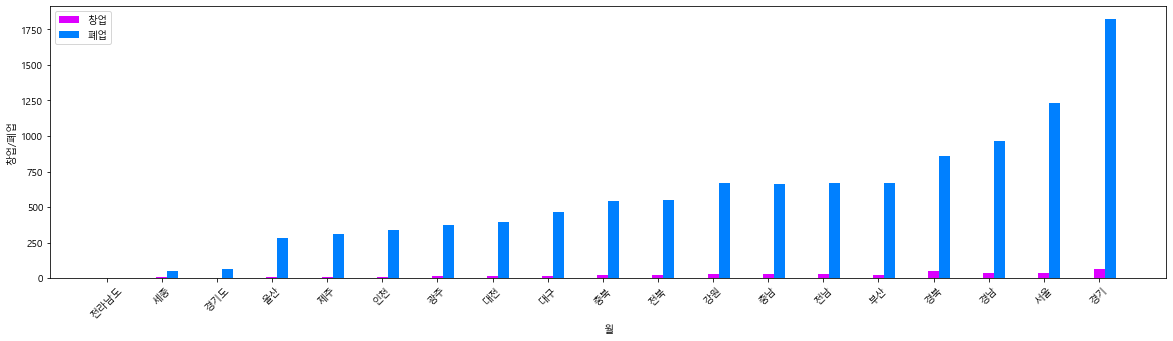

In [44]:
kor_do = ['전라남도','세종','경기도','울산','제주','인천','광주','대전','대구','충북','전북','강원','충남','전남','부산','경북','경남','서울','경기']
f1 = []
f2 = []
dlvr_category=[]
for i in kor_do:
    dlvr_category1 = startup_region_food['BRTC_NM'] == i
    division_1 = startup_region_food['DIVISION'] == 1
    division_0 = startup_region_food['DIVISION'] == 0
    subset_df1 = startup_region_food[dlvr_category1 & division_1] 
    subset_df0 = startup_region_food[dlvr_category1 & division_0]
    f1.append(len(subset_df1))
    f2.append(len(subset_df0))

label = ['전라남도','세종','경기도','울산','제주','인천','광주','대전','대구','충북','전북','강원','충남','전남','부산','경북','경남','서울','경기']

x = np.arange(len(label))
plt.figure(figsize=(20,5))
plt.bar(x-0.0,f1,label='창업',width=0.2,color='#dd00ff')
plt.bar(x+0.2,f2,label='폐업',width=0.2,color='#0080ff')
plt.xticks(x,label,rotation=45)


plt.legend()
plt.xlabel('월')
plt.ylabel('창업/폐업')

plt.show()

결과 : 

전국의 데이터가 지역별로 나누어진 데이터였습니다. 따라서 광역시도명 명칭으로 우선적으로 요식업으로 분류한 데이터를 창업과 폐업의 비율을 확인하였고 서울과 경기 즉 수도권의 요식업의 창업과 폐업이 많다는 내용을 확인하였습니다. 해당 데이터는 비율을 활용하여야 역할이 있을 것이라 생각하였지만 이미 기존의 제공받은 데이터속 정보가 많이 치우친 모습을 보여 비율을 확인하는 단계는 진행하지 않았습니다.

따라서 대구의 변화의 모습은 본 데이터가 5월에 많은 데이터가 몰려 있는 데이터라 변화량의 확인은 어려운 모습을 보여주었습니다.

# StartupOrClosing_shop / StartupOrClosing_region 데이터의  한계


  -- 폐업을 하기 까지 어느정도 사업자을 운영하였는지와 관련한 데이터가 없어서 지속적으로 운영을 하다 코로나로 인한 폐업을 하였는지 아니면 코로나 이전에 시작하다 코로나로 인한 매출의 감소로 인해 폐업을 하였는지를 파악할 방법이 없어 데이터를 코로나 이전과 이후로 구분하여 시각화 하는 측면에 해당 데이터가 의미가 없을 것이라고 생각하였습니다

  -- 데이터를 수집해주신 기관에서 날짜 데이터가 데이터가 생성된 날짜로 되어 있어 해당 데이터의 생성이 특정 일에 몰려 있는 모습을 보아 해당 특정 일 이전에 폐업한 데이터는 생성하지 않고 있다가 특정 일로 몰려 들어간 모습으로 보여집니다. 따라서 데이터와 관련하여 코로나 이전 이후를 기준으로 데이터를 정리하는 측면에 많은 아쉬움이 남습니다. 데이터가 데이터가 생성된 날짜가 아닌 폐업한 날짜 혹은 폐업신청을 한 날짜의 데이터가 있었으면 더욱 좋은 관점을 제시할 수 있었을 것이라 생각합니다.

  -- StartupOrClosing_shop 데이터의 범위에 관한 설명이 없는 점이 아쉬웠습니다. 특정 지역의 업종/상호명 구분인지 아니면 전체 지역의 업종/상호명 구분인지를 알 수 없어 본 상호명 창업과 폐업의 데이터의 신뢰성이 많이 부족하다고 생각합니다. 그리고 또한 창업의 데이터의 크기가 많이 다른 모습을 보여주었습니다. StartupOrClosing_region의 서울의 창업의 데이터를 확인한 결과와 인터넷의 중소벤처기업부의 보도자료를 확인한 결과 제공받은 데이터는 전체를 포함하지 않고 있다고 생각하였고 우리마을가게 상권분석 홈페이지의 서울의 개폐업률을 확인하여도 창업의 모습은 많이 차이가 나고 있는 것을 확인할 수 있었습니다. 따라서 2개의 데이터가 무엇을 위해 제공되었는지 의문점이 많은 데이터였고 많은 지역의 데이터를 확보하지 않은 경우 특정 지역의 명칭과 혹은 더욱 세부적인 내용의 측면을 제공해주시면 더욱 좋은 관점이 나올 것으로 생각됩니다.

  -- 해당 업종/상호명(지역별) 데이터를 가지고 국민의 배달문화를 비교하고 싶어 190개로 분류한 요식업의 업종에서 16개의 Dlvr_call의 업종으로 나누는 과정에서 50개 이상이 한식으로 포함되었고 임의로 많은 업종을 분류하여야 하는 상황이 되었습니다. 이러한 과정에서 한식의 비중이 너무 커지는 모습이 나타났습니다. 그리고 상호명에 많은 오류가 있는 것도 찾았습니다. 한식에 돈까스가 들어 있거나 충북대학교 같은 기관도 들어있는 모습에 데이터를 활용하게 되면 어떻게 이러한 업종이 분류가 되어 있지 않은 항목에 관한 처리를 어떻게 하여야 하는지 의문이 들었습니다. 마지막으로 해당 업종명에서 배달의 유무를 판단할 수 있는 데이터가 없어 요식업으로 분류 하였으나 해당 요식업이 배달을 하는 요식업인지 아닌지 구별할 수 있는 데이터가 없었습니다. 코로나 이후 배달이 증가하였고 홀을 방문하는 고객들이 줄어든 상황을 확인하기 위해서 추가적인 설명이 더욱 되어 있으면 더욱 좋은 관점이 나올 것으로 생각됩니다.

출처 : [치킨집이라도 해볼까"…불황에 창업 늘었지만 절반 5년내 폐업](https://www.mk.co.kr/news/society/view/2021/07/729566/)


출처 : [3년내 절반 망하는데…식당창업 달려드는 30대 청년·70대 은퇴자](https://www.mk.co.kr/news/economy/view/2020/05/512515/)



출처 : [코로나19를 넘어 도약하는 창업국가, 2020년 연간 창업기업 동향](https://www.k-startup.go.kr/common/post/detail.do?mid=30005&bid=710&postSn=129149)



출처 : [우리마을가게 상권분석 서비스 지역/상권별 현황](https://golmok.seoul.go.kr/regionAreaAnalysis.do )

-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# 외부데이터 활용

데이터의 한계점으로 인하여 창업과 폐업에 관한 데이터의 처리를 할 수 없을 것 같아 외부데이터인 우리마을가게 상권분석의 데이터를 활용하여 창업률과 폐업률의 변화를 확인하였습니다.


### **우리마을가게 상권분석 서울시 데이터 2019년 4분기 ~ 2020년 2분기**

### **각 구별 동별 창업대비 폐업률 2020년 2분기 기준**

## 가정 : 
서울시의 폐업률과 창업대비 폐업률이 낮은 지역은 상권이 잘 발달되어 있고 앞으로의 미래가치가 있는 상권으로 투자 대비 현금흐름이 좋을 것으로 생각할 수 있을 것입니다. 

### **서울시 구별 폐업률 = 구별 폐업 수 / 서울시 전체 폐업 수**


### **동별 폐업률 = 동별 폐업 수 / 구 전체 폐업 수**


### **구별 창업대비 폐업률 = 동별 폐업 수 / 동별 창업 수**

![서울시 전체 구별](https://user-images.githubusercontent.com/88020829/130312719-04e9c430-55c1-48f6-813f-8989a6f34382.png)


서울시 전체의 2019년 4분기 부터 2020년 2분기 까지의 폐업률을 확인하였습니다. 전체적인 데이터가 많이 나오나 dlvr_call의 데이터와 같이 활용하기 위해 배달데이터에서 상위 5개의 구만 따로 확인합니다.



![서울시 구별2](https://user-images.githubusercontent.com/88020829/130315565-e35c5085-ced6-4b9a-b334-7079c607dda9.png)
 
전체 서울시 데이터 중 dlvr_call 데이터 중 배달량의 상위 5개 구를 기준으로 선정하여 서울시 구별 폐업률의 변화를 살펴보았습니다. 

dlvr_call의 데이터 중 서울시를 기준으로 가장 많은 배달량을 가지고 있는 지역구의 순서는 구로구 -> 금천구 -> 영등포구 -> 도봉구 -> 은평구의 순서로 이루어져 있다고 dlvr_call 데이터 시각화에서 확인할 수 있습니다. 


-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# 구로구

![구로구](https://user-images.githubusercontent.com/88020829/130315547-8f2f67a5-02da-48a4-ac02-507574da78b3.png)


구로구를 먼저 확인하면 구로구의 각 동별 폐업률의 변화는 구로 2동과 구로 3동이 가장 높게 나옵니다. 하지만 밑에 그래프인 창업대비 폐업률을 보면 구로 2동과 구로 3동은 창업과 폐업이 모두 많은 지역이고 2개의 동이 구로구 전체 폐업의 수를 차지하는 비중이 크다는 것을 알 수 있습니다. 반대의 모습으로 구로 1동은 창업대비 폐업률이 3에 가까운 모습을 보여 줍니다. 이는 창업을 1개 하면 3개의 폐업하는 요식업 영업장이 나온다는 의미로 해석할 수 있으며 구로1동의 전체적인 요식업 영업장의 수는 적지만 폐업하는 가계들이 많다는 해석을 할 수 있을 것입니다. 

이러한 해석을 할 수 있는 데이터를 가지고 폐업률이 낮아지고 있으면서 창업대비 폐업률이 낮은 지역을 선택하면 구로 5동을 선택할 수 있습니다.

 구로 2동과 구로 5동을 비교하여 구로 2동은 창업과 폐업이 둘다 많은 지역이고 구로 2동은 이미 기존 상권에 수많은 경쟁자가 존재할 것으로 생각할 수 있습니다. 따라서 본 데이터를 확인하면 구로 5동이 경쟁자와 창업대비 폐업률도 적어 미래가치가 좋은 시장이라고 생각할 수 있습니다.

이후 이러한 생각이 맞는지 확인하기 위해 우리마을가게에서 제공한 시각화와 비교하였습니다.


![우리마을가게](https://user-images.githubusercontent.com/88020829/130313133-2721871f-082b-49fd-b6fb-979d59ffd53f.PNG)



서울시에서 제공하는 우리마을가게 상권분석의 4가지 기준으로 상권을 분석하고 있으며 


초록(LL)
특정시점 사업체의 영업기간이 서울시 평균 생존 및 폐업영업기간 대비 평균 생존영업기간 ▼, 평균 폐업영업기간 ▼
→ 도시재생 및 신규 개발 상권으로 창업 진출입시 세심한 주의 상권(지역)



노랑(LH)
특정시점 사업체의 영업기간이 서울시 평균 생존 및 폐업영업기간 대비 평균 생존영업기간 ▼, 평균 폐업영업기간 ▲
→ 경쟁력 있는 신규 창업 우위 상권(지역)



주황(HL)
특정시점 사업체의 영업기간이 서울시 평균 생존 및 폐업영업기간 대비 평균 생존영업기간 ▲, 평균 폐업영업기간 ▼
→ 경쟁력 있는 기존 업체 우위 상권(지역)



빨강(HH)
특정시점 사업체의 영업기간이 서울시 평균 생존 및 폐업영업기간 대비 평균 생존영업기간 ▲, 평균 폐업영업기간 ▲
→ 창업 진출입시 세심한 주의 상권(지역)


![구로 2동](https://user-images.githubusercontent.com/88020829/130313132-bef454a6-741f-4c4c-9b36-dee17f1176fc.PNG)


구로 2동의 모습은 상권이 전반적으로 축소 정체의 색을 보이고 있다고 보여주고 있습니다.

![구로5동](https://user-images.githubusercontent.com/88020829/130316188-d0098a40-3c1d-4270-898e-e9198e6b5898.PNG)

구로 5동의 모습은 전반적으로 다이나믹과 상권확장의 모습을 보여주고 있습니다.

이러한 외부데이터를 활용하여 구로구에 특정 업종을 창업하게 될 경우 구로 5동에서 자신만의 차별화를 중점으로 한 창업을 하는 것이 도움이 될 것으로 보고 있습니다.
-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# 금천구

![금천구](https://user-images.githubusercontent.com/88020829/130315543-69df6e58-a45c-491c-ac18-f1489ebc7353.png)


배달량이 2번째로 많은 금천구를 확인하면 구로구의 각 동별 폐업률의 변화는 구로 가산동이 가장 높게 나옵니다. 그렇지만 가산동의 폐업률은 2020년 1분기의 고점을 기준으로 내려오는 모습을 보여줍니다. 밑에 그래프인 창업대비 폐업률을 보면 가산동은 창업과 폐업이 모두 많은 지역이고 가산동과 시흥1동이 금천구 전체 폐업의 수를 차지하는 비중이 크다는 것을 알 수 있습니다. 반대의 모습으로 시흥3동은 창업대비 폐업률이 5에 가까운 모습을 보여 줍니다. 이는 창업을 1개 하면 5개의 폐업하는 요식업 영업장이 나온다는 의미로 해석할 수 있으며 시흥3동의 전체적인 요식업 영업장의 수는 적지만 폐업하는 가계들이 많다는 해석을 할 수 있을 것입니다. 

따라서 금천구에 창업을 할 계획을 가지고 있는 경우 가산동에 창업을 하는 것이 우선 기초적인 상권이 잘 갖춰 있고 경쟁자는 많이 분포되어 있지만 상권이 계속 증가하고 있어 자신의 요식업 만의 강점을 차별화 하여 운영을 하는 것이 가장 좋아 보인다고 생각하게 되었습니다.

이후 이러한 생각이 맞는지 확인하기 위해 우리마을가게에서 제공한 시각화와 비교하였습니다.



![가산동](https://user-images.githubusercontent.com/88020829/130313756-1fb0d780-8235-450e-98cb-9537ba192d93.PNG)


가산동의 모습은 상권이 전반적으로 다이나믹 확장의 색을 보이고 있다고 보여주고 있습니다. 하지만 다른 비교 할 상권이 없어 

금천구에 특정 업종을 창업하게 될 경우 가산동에서 선정한 업종에 자신만의 차별화를 중점으로 한 창업을 하는 것이 도움이 될 것으로 보고 있습니다.


-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# 영등포구


![영등포구](https://user-images.githubusercontent.com/88020829/130315545-e84144d0-0f97-4a98-b3c1-b0e175762079.png)


영등포구의 데이터를 보면 여의동의 폐업률은 점점 증가하는 추세를 보이고 있습니다. 그리고 창업대비 폐업률은 1 이상으로 창업과 폐업이 자주 일어나는 곳이라고 판단할 수 있습니다. 이후 영등포동도 또한 창업대비 폐업률이 1을 넘는 모습으로 확인되어 2개의 구에는 창업보다는 폐업이 많이 된다는 것을 확인할 수 있고 이렇게 많은 폐업의 비중이 큰 편이라 적당한 상권이 아니라고 생각하였습니다.

따라서 영등포구에서는 문래동이 폐업률이 점점 줄어드는 모습과 창업대비 폐업률이 1보다 낮은 모습으로 보아 폐업이 적게 일어나는 곳이라 판단할 수 있을 것입니다.

![문래동](https://user-images.githubusercontent.com/88020829/130315739-ab945527-657d-4173-bc67-74b12baa0aa1.PNG)

문래동의 모습은 다이나믹 확장의 색을 보이고 있고 전체적인 구도 확장의 색을 보이고 있어 경쟁력 있는 신규 창업의 아이디어가 있으면 해당 구에서 성장할 수 있는 지역으로 보고 있습니다.

따라서 영등포구에서 창업을 할 계획이 있으면 영등포구의 문래동에서 자신의 경쟁력을 활용한 요식업의 창업도 미래가치가 있어 보입니다.


-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# 은평구


![은평구](https://user-images.githubusercontent.com/88020829/130315546-937961a5-f587-4581-b8d0-07e4a15f8265.png)

은평구의 데이터를 보면 역촌동의 폐업률이 지속적으로 떨어지는 모습을 보이고 있고 역촌동의 창업대비 폐업률 또한 낮은 수치를 보여주어 은평구에서 창업을 할 경우 역촌동의 상권이 가장 좋은 상권일 될 것이라고 판단할 수 있었습니다.

이렇게 판단한 데이터를 우리마을가게에서 찾아보면 

![역촌동](https://user-images.githubusercontent.com/88020829/130316624-e050bbb7-d34d-4f64-9824-77b4813bd7cf.PNG)

역촌동은 다이나믹한 상권을 특징으로 보여줍니다. 따라서 새로 성장하는 상권이라 창업을 생각하기에 주의할 점이 있지만 새로 성장하는 상권이라 다른 상권에 비해 경쟁자가 많지 않다는 뜻으로 해석할 수 있습니다.

따라서 역촌동에서 창업을 하면 새로 성장하는 상권에 맞춰 고객의 니즈를 빠르게 판단하고 수정할 수 있는 요식업의 창업이 필요할 것이라고 생각합니다. 


# 외부데이터의 한계점

  -- 본 외부데이터는 서울의 각 구별 동별 상권을 분류하여 보여줍니다. 하지만 배달의 시대에 살고 있는 우리는 하나의 동을 넘어서 많으면 3개 4개의 동을 커버하는 음식배달을 하고 있습니다. 따라서 이러한 상권분석이 배달관련 요식업과는 거리감이 조금 있을 것이라 생각됩니다. 하지만 배달이 아닌 홀을 운영하는 식당의 경우에는 우리마을가게 상권데이터는 하나의 중요한 지표로 활용할 수 있을 것입니다. 
 
  -- 음식점의 분류에 빠르게 성장하는 배달 전문업체의 측면과 대표적인 야식으로 뽑히는 족발/보쌈 등의 데이터를 어떠한 항목으로 처리되어 있는지 적혀있지 않아 임의로 구분하거나 전체 산업으로 데이터를 확인하여야 했습니다. 따라서 세부적인 업종에 관한 기준이 주어지면 더욱 명확한 시각화와 새로운 시각을 만들 수 있을 것이라 생각합니다.

  -- 본 데이터는 [상권정보](https://sg.sbiz.or.kr/godo/index.sg) 데이터간의 차이가 있는 것으로 보입니다. 상권정보 페이지에서는 더욱 자세한 항목과 유동인구 상권의 평균 매출액을 확인할 수 있지만 해당 데이터를 제공받지 못하여 아쉬운 점이 있었습니다. 따라서 외부데이터로 활용한 우리마을가게도 상권정보와 같이 유동인구와 세부 업종별 매출액과 배달/홀/테이크아웃 등의 더욱 자세한 정보가 제공이 되어지면 더욱 세밀하고 금액적으로도 인구통계학적으로도 분석을 할 수 있으면 더욱 좋은 데이터를 가질 수 있을 것이라 생각합니다. 
  
  -- dlvr_call의 배달량이 많은 상위 5가지 구를 선정하여 상권의 창업과 폐업을 확인하고 각 구의 동별로 창업의 모습과 폐업의 모습을 확인하였습니다. 하지만 구별 유동인구의 데이터는 popl의 데이터를 활용하여 위에서 설명하였지만 각 구별 시간대 별 유동인구에 관한 설명이 없어 많이 아쉬웠습니다.



-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

출처 : [우리마을가게](https://golmok.seoul.go.kr/main.do)

출처 : [상권정보](https://sg.sbiz.or.kr/godo/index.sg)

태블로 퍼블릭 : [태블로퍼블릭](https://public.tableau.com/app/profile/.16783923/viz/5_16295228261500/1_1)
